In [1]:
import random
import numpy as np

def create_reference_solution(chromosome_length):

    number_of_ones = int(chromosome_length / 2)

    # Build an array with an equal mix of zero and ones
    reference = np.zeros(chromosome_length)
    reference[0: number_of_ones] = 1

    # Shuffle the array to mix the zeros and ones
    np.random.shuffle(reference)
    
    return reference

In [2]:
# Print an example target array
print (create_reference_solution(8))

[1. 0. 0. 0. 1. 1. 0. 1.]


In [3]:
def create_starting_population(individuals, chromosome_length):
    # Set up an initial array of all zeros
    population = np.zeros((individuals, chromosome_length))
    # Loop through each row (individual)
    for i in range(individuals):
        # Choose a random number of ones to create
        ones = random.randint(0, chromosome_length)
        # Change the required number of zeros to ones
        population[i, 0:ones] = 1
        # Sfuffle row
        np.random.shuffle(population[i])
    
    return population

In [4]:
print (create_starting_population(4, 8))

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1.]]


#### Calculate fitness of population

In [5]:
def calculate_fitness(reference, population):
    # Create an array of True/False compared to reference
    identical_to_reference = population == reference
    # Sum number of genes that are identical to the reference
    fitness_scores = identical_to_reference.sum(axis=1)
    
    return fitness_scores

In [6]:
reference = create_reference_solution(8)
print ('Reference solution: \n', reference)
population = create_starting_population(6, 8)
print ('\nStarting population: \n', population)
scores = calculate_fitness(reference, population)
print('\nScores: \n', scores)

Reference solution: 
 [1. 0. 1. 0. 1. 1. 0. 0.]

Starting population: 
 [[1. 1. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0.]]

Scores: 
 [6 4 3 6 4 5]


In [8]:
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return the chromsome of the winner
    return population[winner, :]

In [10]:
# Set up and score population
reference = create_reference_solution(8)
print(reference)
population = create_starting_population(6, 8)
print(population)
scores = calculate_fitness(reference, population)
print(scores)

# Pick two parents and dispplay
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)
print (parent_1)
print (parent_2)

[1. 1. 0. 0. 1. 0. 1. 0.]
[[0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[4 4 5 6 4 4]
[1. 1. 0. 0. 0. 1. 0. 0.]
[1. 0. 1. 0. 1. 0. 1. 0.]


In [17]:
def breed_by_crossover(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1,chromosome_length-1)
    #print("cross point"+str(crossover_point))
    
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    # Return children
    return child_1, child_2

In [18]:
# Set up and score population
reference = create_reference_solution(8)
population = create_starting_population(100, 8)
scores = calculate_fitness(reference, population)

# Pick two parents and dispplay
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)

# Get children
child_1, child_2 = breed_by_crossover(parent_1, parent_2)

# Show output
print ('Parents')
print (parent_1)
print (parent_2)
print ('Children')
print (child_1)
print (child_2)

cross point6
Parents
[1. 1. 0. 0. 1. 0. 1. 1.]
[0. 0. 0. 1. 1. 1. 0. 1.]
Children
[1. 1. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 1. 1. 1. 1. 1.]


In [19]:
def randomly_mutate_population(population, mutation_probability):
    
    # Apply random mutation
        random_mutation_array = np.random.random(
            size=(population.shape))
        
        random_mutation_boolean = \
            random_mutation_array <= mutation_probability

        population[random_mutation_boolean] = \
        np.logical_not(population[random_mutation_boolean])
        
        # Return mutation population
        return population

In [21]:
# Set up and score population
reference = create_reference_solution(8)
population = create_starting_population(50, 8)
scores = calculate_fitness(reference, population)

# Pick two parents and display
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)

# Get children and make new population 
child_1, child_2 = breed_by_crossover(parent_1, parent_2)
population = np.stack((child_1, child_2))

# Mutate population
mutation_probability = 0.25
print ("Population before mutation")
print (population)
population = randomly_mutate_population(population, mutation_probability)
print ("Population after mutation")
print (population)

cross point2
Population before mutation
[[0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]]
Population after mutation
[[1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 0. 0.]]


Starting best score, percent target: 75.0
cross point6
cross point4
cross point4
cross point3
cross point4
cross point6
cross point6
cross point2
cross point5
cross point4
cross point5
cross point2
cross point2
cross point4
cross point5
cross point7
cross point4
cross point1
cross point1
cross point3
cross point7
cross point5
cross point3
cross point1
cross point3
cross point6
cross point5
cross point3
cross point2
cross point2
cross point7
cross point2
cross point2
cross point1
cross point2
cross point2
cross point6
cross point2
cross point7
cross point7
cross point7
cross point3
cross point4
cross point7
cross point4
cross point4
cross point6
cross point7
cross point3
cross point2
cross point4
cross point4
cross point1
cross point3
cross point5
cross point2
cross point2
cross point7
cross point7
cross point6
cross point3
cross point3
cross point2
cross point4
cross point6
cross point7
cross point5
cross point4
cross point7
cross point2
cross point7
cross point2
cross point2
cross poi

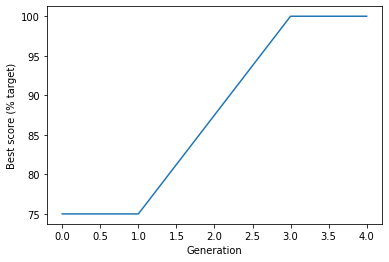

In [22]:
# Set general parameters
chromosome_length = 8
population_size = 50
maximum_generation = 4
best_score_progress = [] # Tracks progress

# Create reference solution 
# (this is used just to illustrate GAs)
reference = create_reference_solution(chromosome_length)

# Create starting population
population = create_starting_population(population_size, chromosome_length)

# Display best score in starting population
scores = calculate_fitness(reference, population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, percent target: %.1f' %best_score)

# Add starting best score to progress tracker
best_score_progress.append(best_score)

# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    scores = calculate_fitness(reference, population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)

# GA has completed required generation
print ('End best score, percent target: %.1f' %best_score)

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()